# Machine Learning(iris_dataset)

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Exploratory Data Analysis

In [2]:
# load dataset
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

'Bunch' that means dictionary type(key-value pairs)

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# We'll assign feature and target data to X and y
X = iris.data
y = iris.target

# we'll hen build a dataframe with feaure data
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


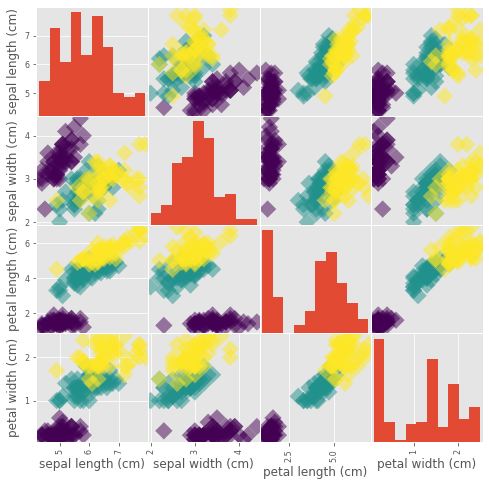

In [9]:
# visual EDA
_ = pd.plotting.scatter_matrix(df, c= y, figsize=[8, 8], marker='D', s=150)
plt.show()

The result is a marix of figure, which on the diagonal are histograms of feaures corresponding to row and column.The off-diagonal figures are scatter plots of column feature vs row feature coloured by the target variable.<br>
In 12 box, the petal length and petal width are highly correlated and the flowers are clustered according to species.

### Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

For now, a random unlabeled data point has been generated and is available to you as X_new. So one will use that classifier to predict the label for this new data point

In [11]:
X_new = np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X)

In [13]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction)) 

Prediction: [0 0 0]


['setosa', 'versicolor', 'virginica'] = [0, 1, 2]

### Split dataset

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))

Test set predictions: [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [16]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9777777777777777


### Overfitting and underfitting

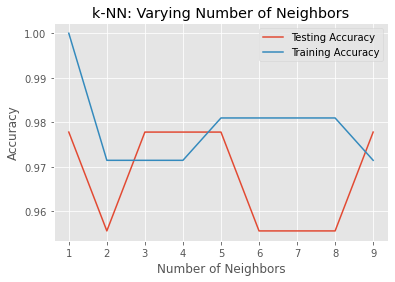

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the training set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 to 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.